By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_

Load the `trips` data into a dataframe.  

In [23]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
trips = pd.read_csv("data/bike_share_201402_trip_data.csv")
#trips = trip.copy()
#cols = trips.columns.tolist()
#cols = [col.replace(' ', '_') for col in cols]
#trips.columns = cols
#trips.head()

How many observations are there?

In [7]:
trips.shape

(144015, 11)

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [27]:
trips.columns = [col.replace(' ', '_') for col in trips.columns]
trips.columns = [col.replace('#', 'num') for col in trips.columns]
#trips.columns = [col.lower for col in trips.columns]
trips.columns = map(str.lower, trips.columns)
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many types of subscription options are there?

In [28]:
trips.subscription_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

What is the frequency of each subscription option?

In [34]:
trips.isin(['Customer']).sum(axis=0)

trip_id                  0
duration                 0
start_date               0
start_station            0
start_terminal           0
end_date                 0
end_station              0
end_terminal             0
bike_num                 0
subscription_type    30368
zip_code                 0
dtype: int64

In [35]:
trips.isin(['Subscriber']).sum(axis=0)

trip_id                   0
duration                  0
start_date                0
start_station             0
start_terminal            0
end_date                  0
end_station               0
end_terminal              0
bike_num                  0
subscription_type    113647
zip_code                  0
dtype: int64

In [45]:
cus1 = trips.query("subscription_type == 'Customer'").subscription_type.count()

In [46]:
cus2 = trips.query("subscription_type == 'Subscriber'").subscription_type.count()

Please plot the frequency of each subscription option with pie chart:

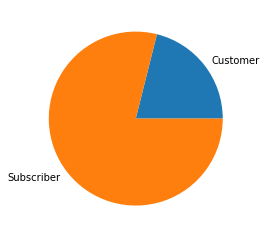

In [51]:
plt.pie([cus1,cus2], labels=["Customer", "Subscriber"]);

Please plot the frequency of each subscription option with bar chart:

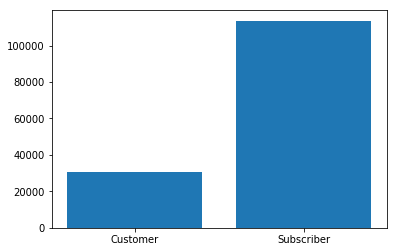

In [55]:
plt.bar(height=[cus1,cus2], x=["Customer", "Subscriber"]);

Repeat same analysis for start_station but sorted from high to low.

In [58]:
trips.start_station.unique()

array(['South Van Ness at Market', 'San Jose City Hall',
       'Mountain View City Hall', 'Golden Gate at Polk',
       'Santa Clara at Almaden', 'San Salvador at 1st', 'Spear at Folsom',
       'San Pedro Square', 'Mountain View Caltrain Station',
       '2nd at South Park', 'Clay at Battery', 'Post at Kearney',
       'Market at 10th', 'Steuart at Market', 'Powell Street BART',
       'Redwood City Caltrain Station', 'San Francisco City Hall',
       'Beale at Market', 'Japantown',
       'Temporary Transbay Terminal (Howard at Beale)',
       'San Jose Civic Center', 'Redwood City Medical Center',
       '2nd at Townsend', 'Civic Center BART (7th at Market)',
       'Commercial at Montgomery', 'Market at 4th', '2nd at Folsom',
       'Washington at Kearney', 'University and Emerson',
       'Yerba Buena Center of the Arts (3rd @ Howard)',
       'Adobe on Almaden', 'Powell at Post (Union Square)',
       'San Francisco Caltrain 2 (330 Townsend)',
       'Grant Avenue at Columbus Av

In [67]:
cus_list = list()
tripssort = trips.sort_values("start_station")
for x in tripssort.start_station.unique():
    cus_list.append(tripssort[tripssort.start_station == x].start_station.count())

cus_list

[3776,
 4458,
 4987,
 2635,
 335,
 339,
 3057,
 201,
 45,
 297,
 132,
 3074,
 2419,
 2834,
 355,
 2300,
 3497,
 2931,
 6545,
 2785,
 218,
 99,
 1757,
 4004,
 7343,
 3263,
 496,
 528,
 3511,
 5030,
 5922,
 2868,
 3,
 1154,
 630,
 431,
 189,
 745,
 2503,
 3836,
 2824,
 378,
 123,
 44,
 248,
 489,
 389,
 238,
 108,
 9838,
 4976,
 1257,
 740,
 346,
 1972,
 23,
 101,
 715,
 597,
 855,
 3521,
 3423,
 366,
 4913,
 5113,
 4493,
 434,
 1472,
 2487]

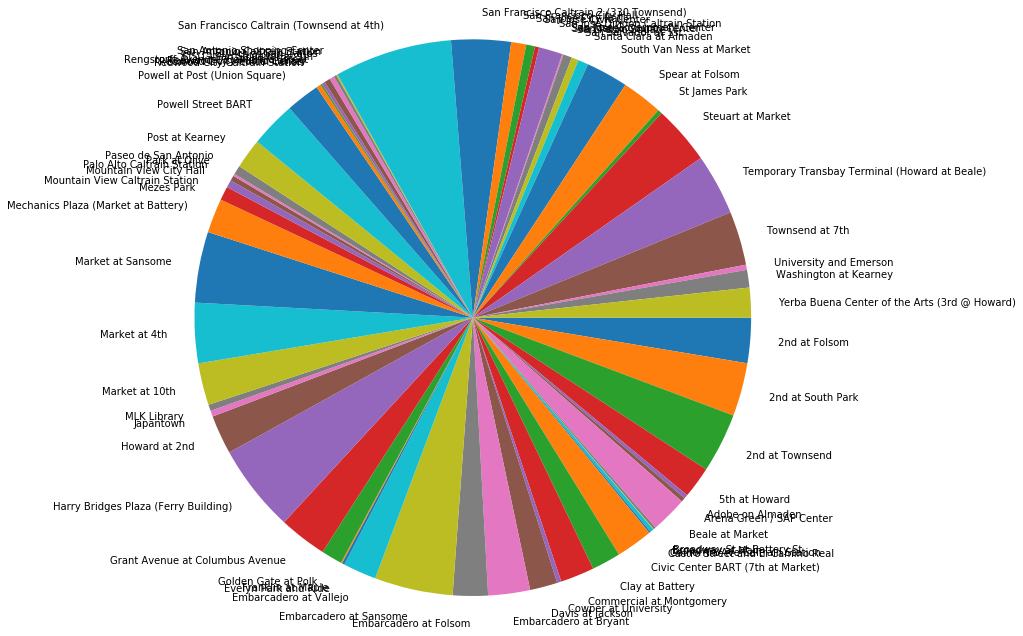

In [78]:
fig = plt.pie(cus_list, labels=tripssort.start_station.unique(), counterclock = False, radius = 3.2);
#fig.set_size(18.5, 10.5)

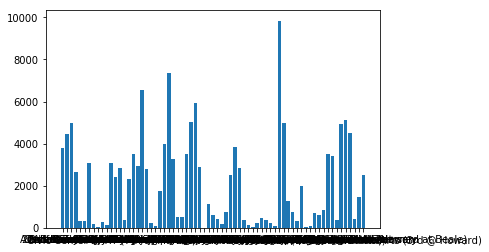

In [76]:
plt.bar(height=cus_list, x=tripssort.start_station.unique());

Repeat same analysis for end_station but sorted from __low to high__.

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

-----

Let's look at duration....

How long is the shortest trip? How many are that short?

In [56]:
trips.duration.min()

60

In [57]:
#trips.duration.value_counts(60)

363      0.001715
406      0.001687
355      0.001666
358      0.001660
301      0.001653
352      0.001653
307      0.001632
449      0.001632
357      0.001625
375      0.001604
344      0.001597
329      0.001590
251      0.001576
267      0.001569
317      0.001569
401      0.001569
278      0.001569
384      0.001569
364      0.001562
349      0.001562
415      0.001555
481      0.001548
476      0.001548
430      0.001542
410      0.001542
424      0.001542
439      0.001542
322      0.001535
338      0.001535
428      0.001528
           ...   
3378     0.000007
2785     0.000007
17723    0.000007
5681     0.000007
10981    0.000007
6755     0.000007
74308    0.000007
7856     0.000007
25068    0.000007
4578     0.000007
10039    0.000007
6883     0.000007
19177    0.000007
2610     0.000007
4962     0.000007
3297     0.000007
23659    0.000007
2738     0.000007
10934    0.000007
48119    0.000007
13158    0.000007
9015     0.000007
7216     0.000007
19258    0.000007
2994     0

What do you think is going on with the shrort trips?

What is the longest trip? How many trips are "long"?

Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

-----
Challenge Exercises
-----

Plot duration

Does that plot give insights?

Select subsections of the data to make a series of plots to enable insights for the Product Team

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

<br>
<br> 
<br>

----